<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up for Health</B> - Brompton Health PCN</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B></span><div style='margin:4px 26px; color:#273333; font-size:16px;'>
   <p>
       Exploratory Data Analysis (EDA) of <B>Missed Appointments in Primary Care</B>. <BR>Dataset collected from six NHS GP practices over a four year period (excluding Pandemic data) - Brompton Health PCN, North West London ICB.
</p>
<p>
    <B>The key features we will examine in this EDA project include:</b>
</p>

<ol>
  <li>
    <strong>Data Quality Assessment</strong>: We will begin by assessing the data quality, including checking for missing values, duplicates, and data entry errors. This step is essential for ensuring that our analysis is based on accurate and reliable information.
  </li>
  <li>
    <strong>Univariate Analysis</strong>: We will explore the distribution and summary statistics of each variable in the dataset, both categorical and numerical. This analysis will provide insights into the central tendency, dispersion, and shape of the data.
  </li>
  <li>
    <strong>Bivariate Analysis</strong>: We will investigate the relationships between pairs of variables, examining potential correlations and dependencies. This analysis will enable us to understand how the variables interact and influence each other, which can be vital when building predictive models.
  </li>
  <li>
    <strong>Multivariate Analysis</strong>: We will explore the interactions among multiple variables simultaneously, enabling us to uncover complex patterns and relationships that might not be apparent through univariate or bivariate analysis.
  </li>
  <li>
    <strong>Outlier Detection</strong>: We will identify and address any outliers in the dataset, as they can significantly impact the results of our analysis and the performance of subsequent models.
  </li>
  <li>
    <strong>Feature Engineering</strong>: Based on the insights derived from our EDA, we will create new features that may enhance our understanding of the dataset or improve the performance of predictive models.
  </li>
</ol>

<p>
  Throughout this exploratory data analysis project, we will employ various data visualization techniques, such as histograms, box plots, scatter plots, and heatmaps, to effectively communicate our findings and facilitate better decision-making. By conducting a thorough EDA, we will lay the foundation for future data-driven projects, ensuring that our analysis is based on a deep understanding of the dataset and its underlying structure.
</p>
</div>

## Loading Libraries 

In [4]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

from showupforhealth.params import *

In [17]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.head()

,Unnamed: 0,Appointment date,Rota,Patient ID,temp,precipitation,Age,Sex,Ethnicity category,Language,...,dist_to_station,distance_to_surg,booked_by_clinician,Appointment_status,months_registered,hour_of_appointment,Day,Week,Month,days_booked_to_app
0,3,2022-07-05,Nurse,4d5c84e0,17.7,0.0,40,0,White,(XaG62) Main spoken language Portuguese,...,0.519419,0.816996,1,1,102.0,9,1,27,7,54
1,4,2022-07-05,Nurse,7eb307c3,18.5,0.0,70,2,Asian,(XaG5t) Main spoken language English,...,0.540792,1.656309,0,1,64.0,10,1,27,7,49
2,5,2022-07-05,Nurse,7eb307c3,18.5,0.0,70,2,Asian,(XaG5t) Main spoken language English,...,0.540792,1.656309,0,1,64.0,10,1,27,7,49
3,6,2022-07-07,HCA,be0d8338,19.4,0.0,66,2,White,(XaG5t) Main spoken language English,...,0.332691,0.600495,0,1,463.0,11,3,27,7,37
4,8,2022-07-07,Nurse,2ca703b3,18.3,0.0,58,0,White,(XaG5t) Main spoken language English,...,0.155802,0.215224,0,1,174.0,9,3,27,7,27


<Axes: xlabel='hour_of_appointment', ylabel='Count'>

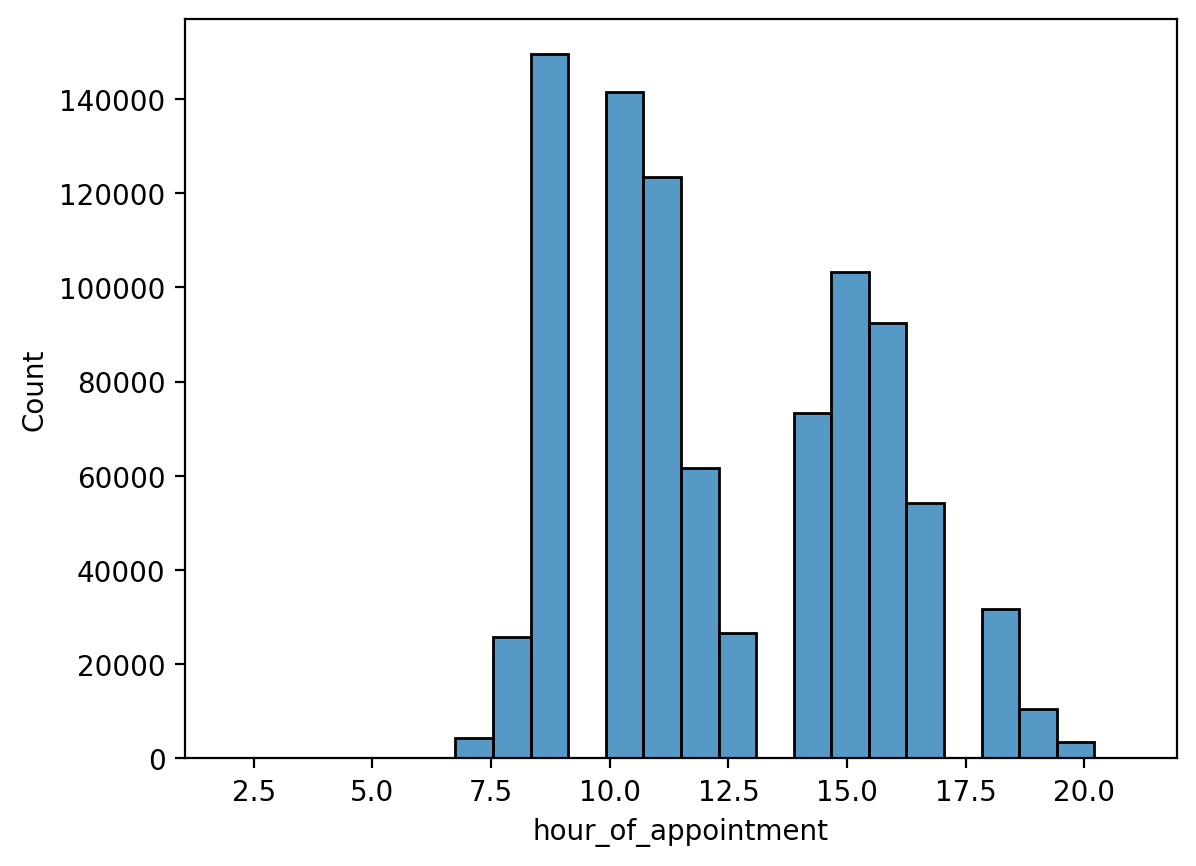

In [29]:
sns.histplot(data['hour_of_appointment'], bins=24)

<Axes: xlabel='Day', ylabel='Count'>

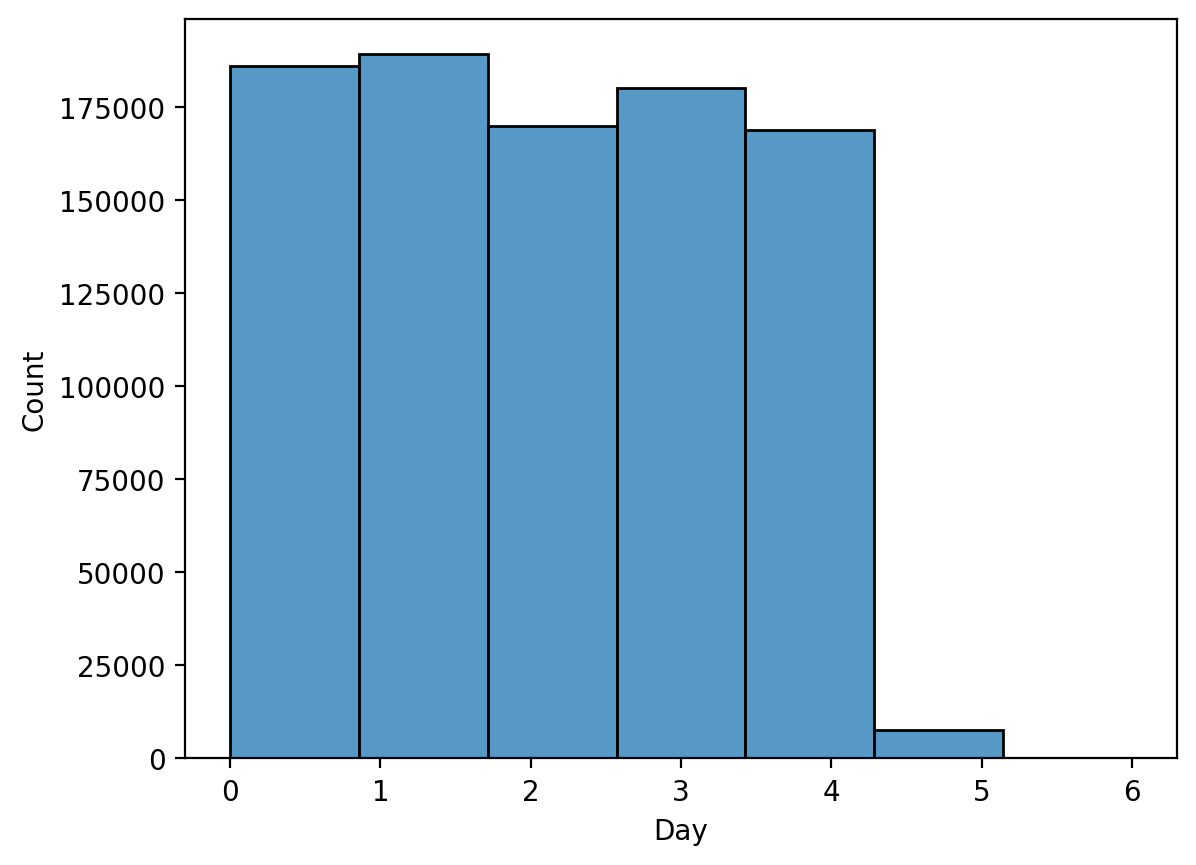

In [28]:
sns.histplot(data['Day'], bins=7)

<Axes: xlabel='Week', ylabel='Count'>

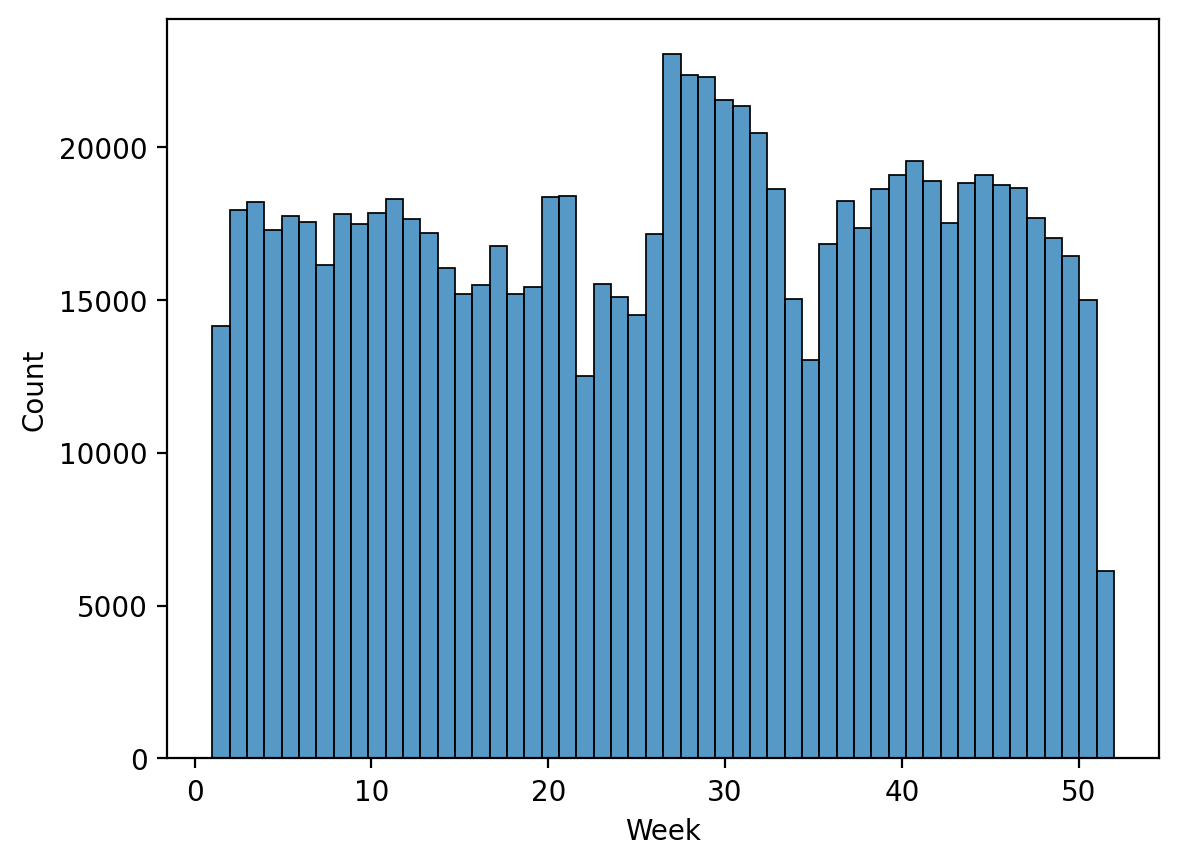

In [26]:
sns.histplot(data['Week'], bins=52)

<Axes: xlabel='Month', ylabel='Count'>

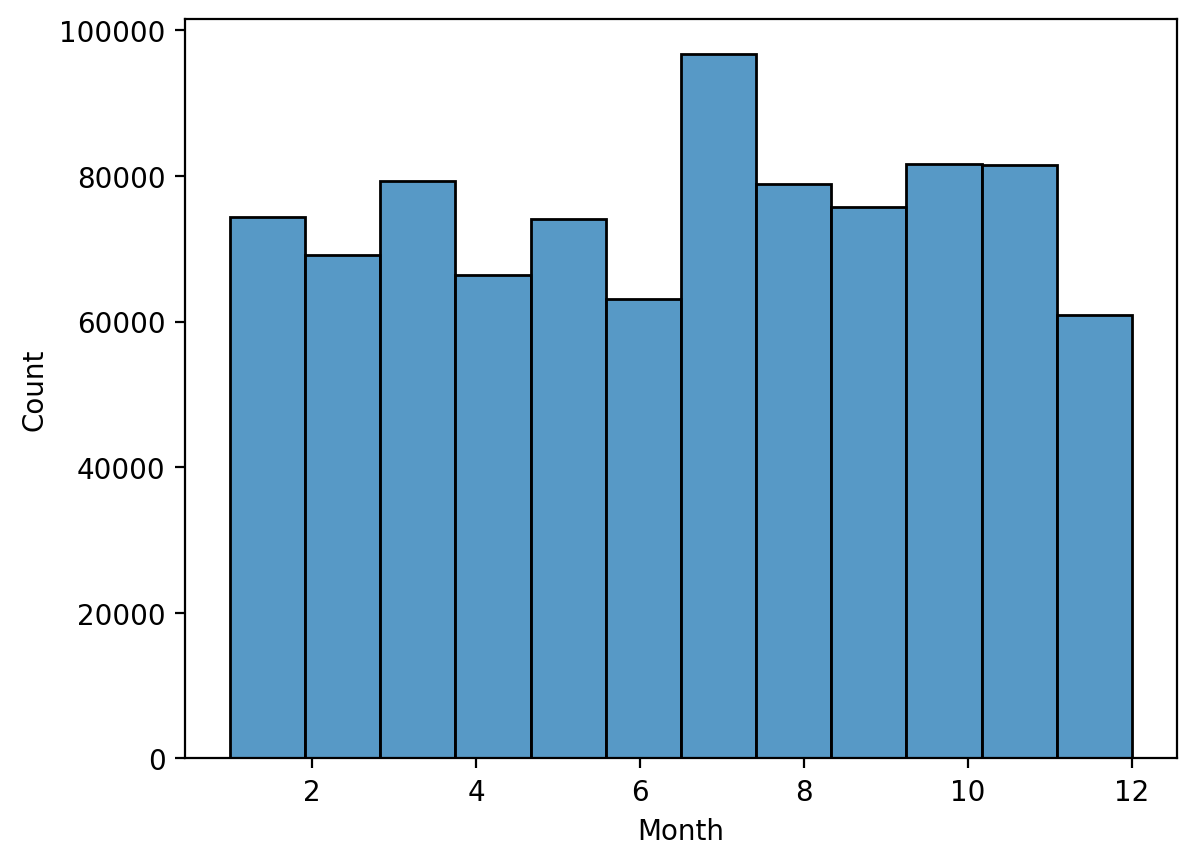

In [27]:
sns.histplot(data['Month'], bins=12)

<B>Normalized Summary Statistics</b> - Heatmap

Seaborn <b>Pairplot</B>

In [ ]:
# sns.pairplot to explore numberic data correlation & outliers.
sns.pairplot(data);

<B>Correlation</B> & Heatmap

In [11]:
data.corr().round(3)

,Patient ID,temp,precipitation,NHS number,Age in years,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,Latitude,Longitude,IMD2023,dist_to_station,distance_to_surg
Patient ID,1.000,0.004,0.003,0.025,0.022,0.066,0.027,0.008,0.005,0.011,0.029,0.019,0.027,-0.008,0.028,0.089,-0.100,-0.053
temp,0.004,1.000,-0.023,-0.014,0.023,0.025,0.011,0.013,0.008,0.011,0.014,0.011,0.015,-0.000,0.003,-0.013,0.006,0.002
precipitation,0.003,-0.023,1.000,-0.002,0.004,0.002,0.001,0.003,0.000,0.000,0.003,0.002,0.003,-0.001,0.002,0.003,0.001,-0.003
NHS number,0.025,-0.014,-0.002,1.000,-0.398,-0.268,-0.081,-0.054,-0.089,-0.034,-0.155,-0.076,-0.066,0.077,-0.014,0.055,-0.059,0.071
Age in years,0.022,0.023,0.004,-0.398,1.000,0.544,0.037,0.085,0.235,0.182,0.423,0.232,0.020,-0.013,0.031,0.010,0.044,-0.097
FRAILTY,0.066,0.025,0.002,-0.268,0.544,1.000,0.206,0.233,0.384,0.314,0.536,0.242,0.151,-0.024,0.036,-0.048,0.027,-0.100
DEPRESSION,0.027,0.011,0.001,-0.081,0.037,0.206,1.000,0.115,0.047,0.016,0.054,0.058,0.131,-0.023,-0.019,-0.099,0.022,-0.010
OBESITY,0.008,0.013,0.003,-0.054,0.085,0.233,0.115,1.000,0.081,0.249,0.224,0.153,0.181,0.022,-0.023,-0.112,-0.019,0.015
IHD,0.005,0.008,0.000,-0.089,0.235,0.384,0.047,0.081,1.000,0.147,0.263,0.133,0.031,-0.007,0.010,-0.026,0.001,-0.028
DM,0.011,0.011,0.000,-0.034,0.182,0.314,0.016,0.249,0.147,1.000,0.292,-0.112,0.041,0.031,-0.008,-0.064,-0.026,0.006


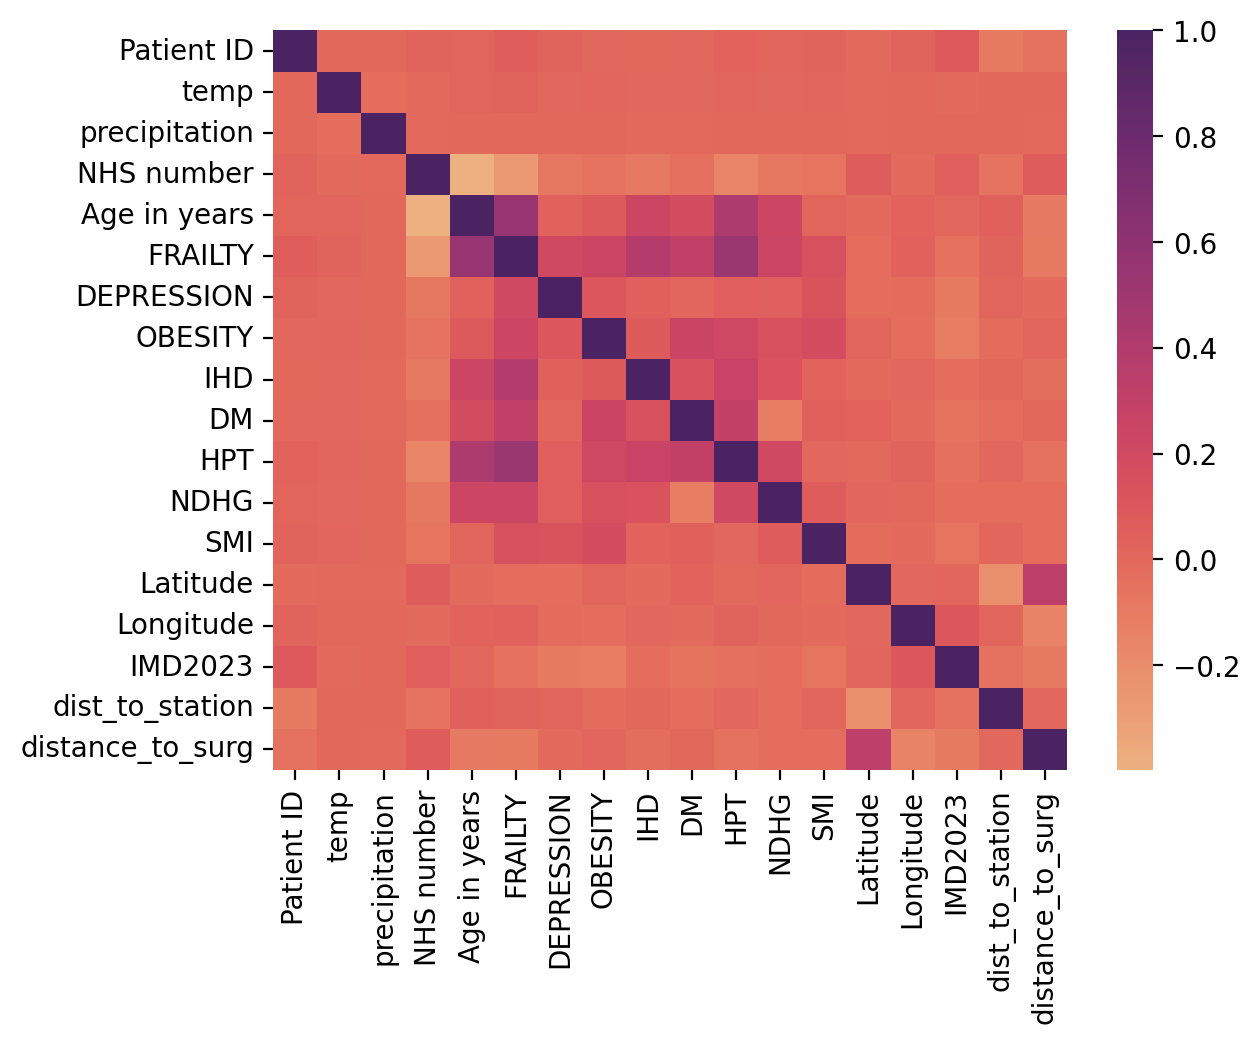

In [13]:
# sns.heatmap cmap options flare (red/purple), crest (blue), other, other
sns.heatmap(data.corr(), annot=False, annot_kws={'size': 9}, fmt='.2f', cmap='flare');

In [2]:
from autonote import AutoNote
an = AutoNote()